Copyright (C) 2025 Advanced Micro Devices, Inc. All rights reserved.
Portions of this notebook consist of AI-generated content.

Permission is hereby granted, free of charge, to any person obtaining a copy

of this software and associated documentation files (the "Software"), to deal

in the Software without restriction, including without limitation the rights

to use, copy, modify, merge, publish, distribute, sublicense, and/or sell

copies of the Software, and to permit persons to whom the Software is

furnished to do so, subject to the following conditions:



The above copyright notice and this permission notice shall be included in all

copies or substantial portions of the Software.



THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR

IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,

FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE

AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER

LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,

OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE

SOFTWARE.

# DL02 Support Vector Machine (SVM) Classification

### Lab Description

This laboratory exercise introduces Support Vector Machines (SVM), a powerful supervised learning algorithm commonly used for classification tasks. In this lab, you will apply an SVM classifier from the `sklearn library` to a non-linearly separable dataset, commonly referred to as the `moon-shaped` dataset.

You will train and evaluate the model, visualize the decision boundaries, and tune hyperparameters to improve classification performance.

### What you can expect to learn

- Understanding SVMs: Learn how SVMs handle non-linear classification using kernel functions.
- Model Training and Evaluation: Train an SVM model and assess its performance using misclassification count and accuracy.
- Decision Boundary Visualization: Gain insights into the model's behavior by visualizing decision regions.
- Hyperparameter Tuning: Explore how changing kernel types and regularization parameters affects model performance, with the goal of achieving at least 0.95 test accuracy.


### Import necessary libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Plot Decision Regions

We visualize how a classifier separates classes in a 2D dataset by plotting decision regions. It helps assess model performance and generalization, especially for non-linear cases like the moon dataset.


In [2]:
from matplotlib.colors import ListedColormap


def _PlotDecisionRegions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],
            linewidths=1,
            marker=markers[idx],
            label=cl,
            edgecolors="k",
        )

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            facecolor="none",
            alpha=1.0,
            linewidths=1,
            marker="o",
            edgecolors="black",
            s=55,
            label="test set",
        )

### Prepare Dataset

We use `make_moons` from `sklearn.datasets` to generate a synthetic 2D dataset of two interleaving half circles, known as the moon dataset. This dataset is commonly used to test classification models on non-linearly separable data. The added noise simulates real-world imperfections and makes the classification task more challenging.

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.25, random_state=20250613)

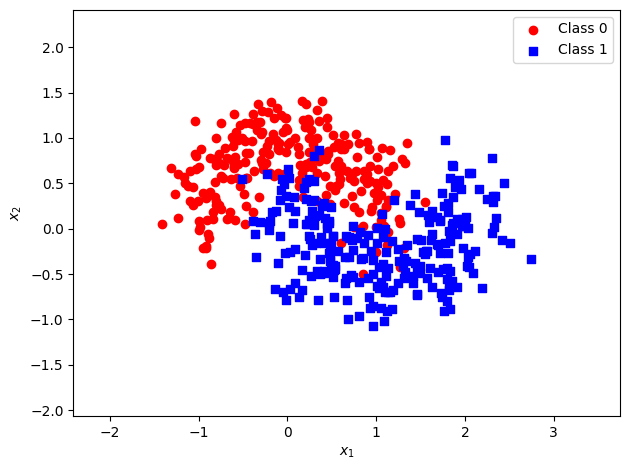

In [4]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r", marker="o", label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="b", marker="s", label="Class 1")

plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Data Splitting and Standardization

We prepare the dataset for training and evaluation:

First, the dataset is split into training and testing sets using `train_test_split`, with 30% reserved for testing. Then, the features are standardized using `StandardScaler` to ensure they have zero mean and unit variance. Standardization helps many machine learning models, including SVMs, perform better by ensuring all features are on the same scale.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20250613)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic Regression

We train and visualize a Logistic Regression model on the standardized training data and evaluates its performance on the test set.


[Logistic regression]
Misclassified samples: 21
Accuracy: 0.86


/tmp/ipykernel_17108/3229598591.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


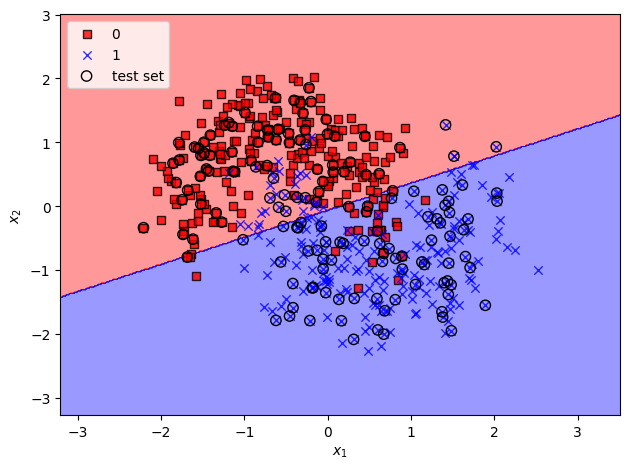

In [6]:
lr = LogisticRegression(C=1000.0, random_state=20250613, solver="liblinear")
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print("[Logistic regression]")
print(f"Misclassified samples: {(y_test != y_pred).sum()}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# plot decision regions for LogisticRegression
_PlotDecisionRegions(
    np.vstack((X_train_std, X_test_std)),
    np.hstack((y_train, y_test)),
    classifier=lr,
    test_idx=range(y_train.size, y_train.size + y_test.size),
)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### SVM
We train a nonlinear Support Vector Machine (SVM) classifier using an RBF kernel. Finally, we visualizes the decision boundaries, showing how the SVM separates the classes in the feature space and how well it performs on both training and test data.

[Nonlinear SVC]
Misclassified samples: 7
Accuracy: 0.95


/tmp/ipykernel_17108/3229598591.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


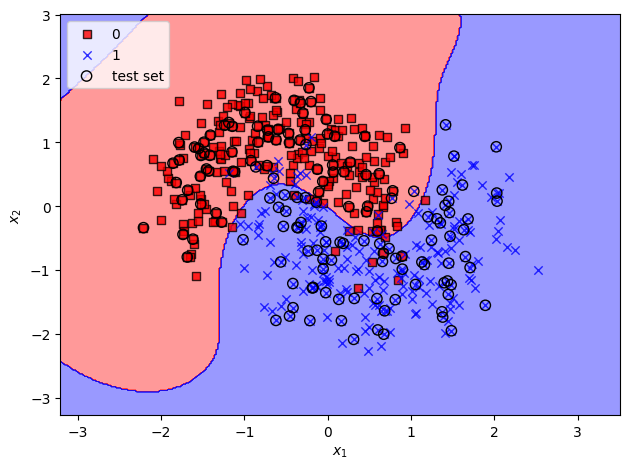

In [7]:
from sklearn.svm import SVC

my_svc = SVC(C=9.5)
my_svc.fit(X_train_std, y_train)

y_pred = my_svc.predict(X_test_std)
print("[Nonlinear SVC]")
print(f"Misclassified samples: {(y_test != y_pred).sum()}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# plot decision regions for LogisticRegression
_PlotDecisionRegions(
    np.vstack((X_train_std, X_test_std)),
    np.hstack((y_train, y_test)),
    classifier=my_svc,
    test_idx=range(y_train.size, y_train.size + y_test.size),
)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()